# Nearest neighbor for Classification of Wine Types
##### Comparing K-NN models using different distance measures based on Accuracy and Processing Time
### Paolo G. Hilado

## <span style="font-family:Palatino Linotype"><font color='teal'>Situationer:</font></span>

The team wishes to learn a model that will classify wines. This project will utilize the K-Nearest Neighbor models with different distance. The KNN models will be assessed in terms accuracy in classifying the wines at the same time speed in processing. 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time
import pandas as pd

## Load the data set
data = pd.read_csv("wine.data", delimiter=",").values
np.random.seed(51)
np.random.shuffle(data)
train_data, test_data = data[:142, 1:], data[142:, 1:]
train_labels, test_labels = data[:142, 0], data[142:, 0]

In [3]:
# Print out the Dimensions
print("Train Data Set Dimensions:", train_data.shape)
print("Test Data Set Dimensions:", test_data.shape)
print("Train Labels Set Dimensions:", train_labels.shape)
print("Test Labels Set Dimensions:", test_labels.shape)

Train Data Set Dimensions: (142, 13)
Test Data Set Dimensions: (35, 13)
Train Labels Set Dimensions: (142,)
Test Labels Set Dimensions: (35,)


In [4]:
# Have a frequency distribution for each label both in the train and test sets
trainL, trainC = np.unique(train_labels, return_counts = 1)
testL, testC = np.unique(test_labels, return_counts = 1)
print("Train Set Distribution:")
print(dict(zip(trainL, trainC)))
print("Test Set Distribution:")
print(dict(zip(testL, testC)))

Train Set Distribution:
{1.0: 45, 2.0: 61, 3.0: 36}
Test Set Distribution:
{1.0: 13, 2.0: 10, 3.0: 12}


Minimum error: 0.17142857142857143 at K = 1


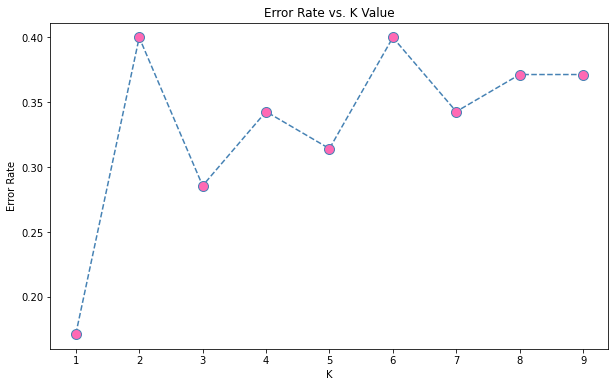

In [5]:
# Check for the optimum number of k to be used for the model
# Here we are using Euclidean Distance for our KNN model
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i, p =2)
 knn.fit(train_data,train_labels)
 pred_i = knn.predict(test_data)
 error_rate.append(np.mean(pred_i != test_labels))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='steelblue', linestyle='dashed',marker='o',markerfacecolor='hotpink', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Minimum error: 0.11428571428571428 at K = 1


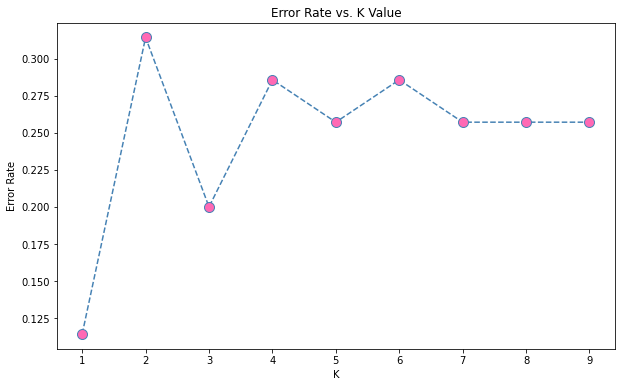

In [6]:
# Check for the optimum number of k to be used for the model
# Here we are using Manhattan Distance for our KNN model
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i, p = 1)
 knn.fit(train_data,train_labels)
 pred_i = knn.predict(test_data)
 error_rate.append(np.mean(pred_i != test_labels))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='steelblue', linestyle='dashed',marker='o',markerfacecolor='hotpink', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [7]:
# Let us test the processing time of our model using Manhattan Distance.
# Create KNN Classifier using the k=1 and Manhattan distance.
from sklearn import metrics
t_beforeM = time.time()
knn = KNeighborsClassifier(n_neighbors=1, p = 1)

#Train the model using the training sets
knn.fit(train_data, train_labels)

#Predict the response for test dataset
pred_labels = knn.predict(test_data)
t_afterM= time.time()

# Model Accuracyn and Processing Time
print("Accuracy of K-NN using Manhattan:", np.round(metrics.accuracy_score(test_labels, pred_labels)*100,2),"%")
print("Classification time (seconds): ", t_afterM - t_beforeM)

Accuracy of K-NN using Manhattan: 88.57 %
Classification time (seconds):  0.00399017333984375


In [11]:
# Let us test the processing time of our model using Euclidean Distance
#Create KNN Classifier using the k=1 and Euclidean distance
t_beforeM = time.time()
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(train_data, train_labels)

#Predict the response for test dataset
pred2_labels = knn.predict(test_data)
t_afterM= time.time()

# Model Accuracyn and Processing Time
print("Accuracy of K-NN using Euclidean:", np.round(metrics.accuracy_score(test_labels, pred2_labels)*100,2),"%")
print("Classification time (seconds): ", t_afterM - t_beforeM)

Accuracy of K-NN using Euclidean: 82.86 %
Classification time (seconds):  0.0030126571655273438


# <span style="font-family:Palatino Linotype"><font color='teal'>Summary</font></span> 
Using a K-NN model in order to classify the types of wines, it can be observed that using Manhattan Distance provides better accuracy (88.57%) than Euclidean Distance (82.86) with little difference in processing time (approximately 0.002 seconds slower). Given the small difference in processing time and with >5% accuracy, we will be using the K-Nearest Neigbor Model with L1 Distance. 